## Loading and testing saved model with real/original data

In [2]:
from Modules.feature_matrix import featureMatrix
from Modules.full_feature_matrix import create_full_feature_and_target_matrix
from Modules.Neural_Network import *
from timeit import default_timer as timer
from tensorflow.keras import models,layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get data original data and convert it to feature matrix

In [3]:
X, Y = create_full_feature_and_target_matrix(printProgress=True)

### Process it for neural network

In [4]:
# Combine X and Y dataframes into one 
df_features = pd.concat([X,Y], axis=1)

# Drop thickness and traindevtest columns 
df_features = df_features.drop(columns=["m_dThickness","traindevtest"])

# Drop filenames in an elegant style
filenames = pd.concat([df_features.pop(x) for x in ['peelFile', 'dryFile']], axis=1)
df_features.head(5)

,m_uWidth,m_uLength,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,B1DecayCount,B1AllOtherDefectWidthSum,...,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryMoisturePercentage,dryWidth,dryShrinkage
0,1750.23265,1599.76152,113.903722,33.013574,997.511787,125.39330,11,26.9537,2,0.0000,...,1028.177020,157.62055,19,39.25865,2,16.99255,2,8.063503,1633.089727,0.933070
1,1750.23265,1599.18000,100.958000,34.138437,960.649786,0.00000,0,0.0000,0,21.0942,...,956.783924,12.89090,1,0.00000,0,7.03140,1,1.762412,1609.685322,0.919698
2,1750.23265,1601.50608,87.856679,35.469453,826.694515,21.68015,2,0.0000,0,0.0000,...,831.718097,49.21980,3,0.00000,0,16.40660,4,0.619572,1614.120061,0.922232
3,1750.23265,1600.34304,119.887972,35.878984,946.037900,22.26610,3,0.0000,0,0.0000,...,962.829528,15.82065,3,0.00000,0,450.00960,1,0.682885,1620.398997,0.925819
4,1750.23265,1600.92456,87.329798,36.486844,848.591452,35.15700,5,0.0000,0,0.0000,...,849.948758,40.43055,5,0.00000,0,0.00000,0,0.649544,1601.162675,0.914828


### Divide it into features and targets + split it to train and test sets

In [7]:
from sklearn.model_selection import train_test_split
# Drop dryShrinkage and dryWidth from features 
# Set dryShrinkage as the target
# Split ratio is 70/30
train_data,test_data,train_targets,test_targets = train_test_split(df_features.drop(["dryShrinkage","dryWidth"],axis=1)
                                                                   ,df_features["dryShrinkage"],test_size=0.3,random_state=42)

In [8]:
print(train_data.shape)
print(test_data.shape)

(95, 84)
(42, 84)


### Standardize / normalize 

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
transformed_train_data = ss.fit_transform(train_data)
transformed_test_data = ss.transform(test_data)

### Load pre-trained model

In [7]:
# Define model and it's path
model= 'Adam3_model.h5' # Newest and the best model atm
path = '/home/jovyan/work/team-network-training/Sprint 5/HDF5Models/'

# model= 'regmodel.h5'
# path= '/home/jovyan/work/team-network-training/Sprint 4/'

# Have to define custom_obejcts (functions from Neural_Network.py) also
loaded_model = tf.keras.models.load_model(path+model, custom_objects={"distance_from_true": distance_from_true,
                                                                      "precentage_from_true": precentage_from_true})       
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               21760     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 65,537
Trainable params: 65,537
Non-trainable params: 0
____________________________________________________

### Evaluate model

In [8]:
model = loaded_model

In [9]:
results = model.evaluate(transformed_test_data, test_targets)

2/2 [==============================] - 1s 5ms/step - loss: 1.3209e-06 - mae: 8.7885e-04 - mse: 1.3209e-06 - distance_from_true: -2.3661e-04 - mape: 0.0955 - precentage_from_true: 0.9997


### Make predictions with test_data

In [10]:
pred = model.predict(transformed_test_data)

### Visualize results

In [11]:
from Modules.model_accuracy import *


		Predicitons and targets
--------------------------------------------------------
 Average difference:	0.00023661715609234784
 Max difference:	0.0023444898970935713
 Min difference:	-0.0031249903307030147
--------------------------------------------------------


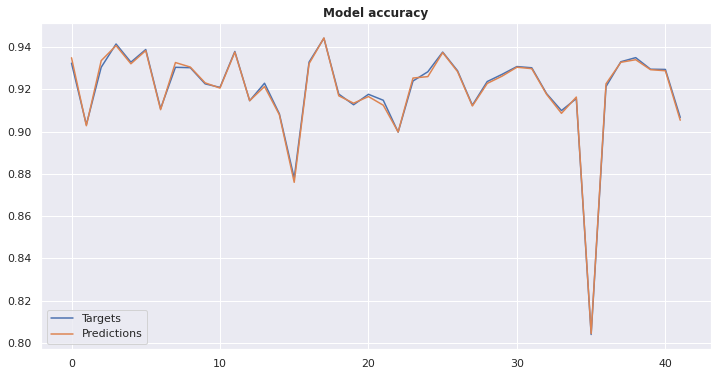

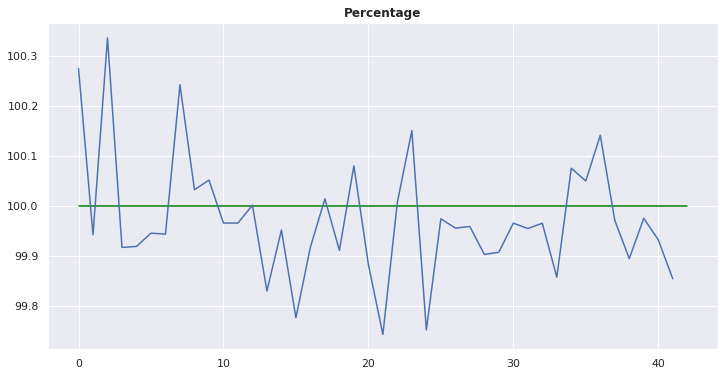

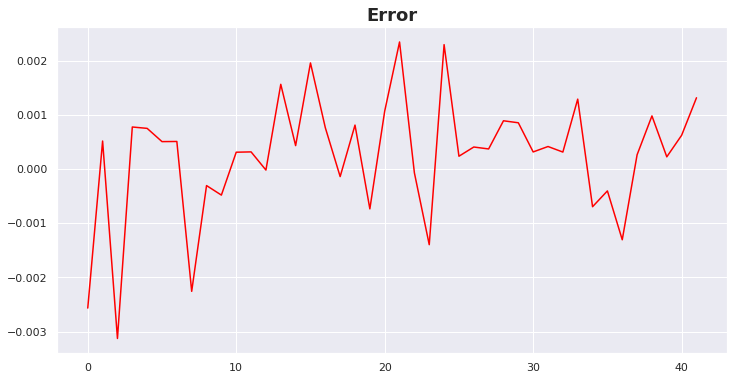

In [12]:
modelAccuracy(model, data=(transformed_test_data,test_targets), visualize=True)

# Testing new pre-trained model
*New model (Adam4_model.h5) is trained with augmentend data WITHOUT real original data.*

### Load model

In [13]:
# Newest and the best model atm
# The original data wasn't included to this model's training
model= 'Adam4_model.h5' 
path = '/home/jovyan/work/team-network-training/Sprint 5/HDF5Models/'

loaded_model = tf.keras.models.load_model(path+model, custom_objects={"distance_from_true": distance_from_true,
                                                                      "precentage_from_true": precentage_from_true})       
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               21760     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 65,537
Trainable params: 65,537
Non-trainable params: 0
____________________________________________________

### Define model

In [20]:
model = loaded_model

### Evaluate model

In [21]:
results = model.evaluate(transformed_test_data, test_targets)

2/2 [==============================] - 0s 7ms/step - loss: 6.0478e-06 - mae: 0.0023 - mse: 6.0478e-06 - distance_from_true: -0.0023 - mape: 0.2474 - precentage_from_true: 0.9975


### Make predictions

In [22]:
pred = model.predict(transformed_test_data)

### Visualize results

In [13]:
from Modules.model_accuracy import *


		Predicitons and targets
--------------------------------------------------------
 Average difference:	0.0022765449679420327
 Max difference:	0.0042766837303847005
 Min difference:	7.220520847650569e-05
--------------------------------------------------------


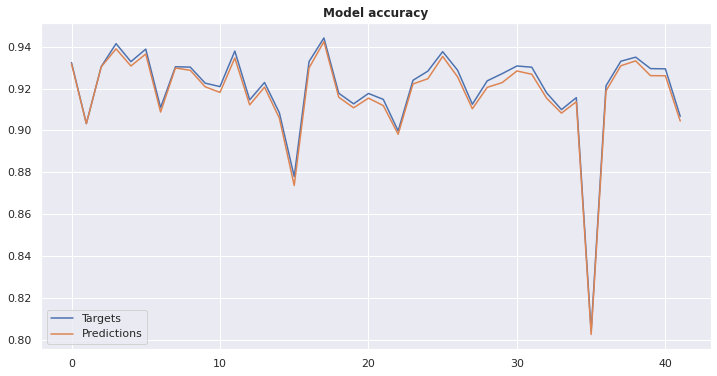

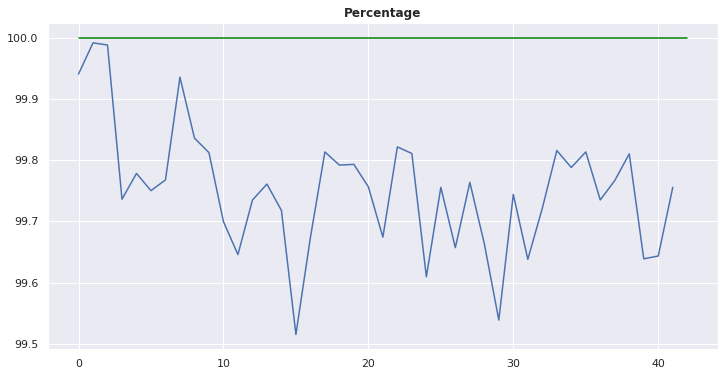

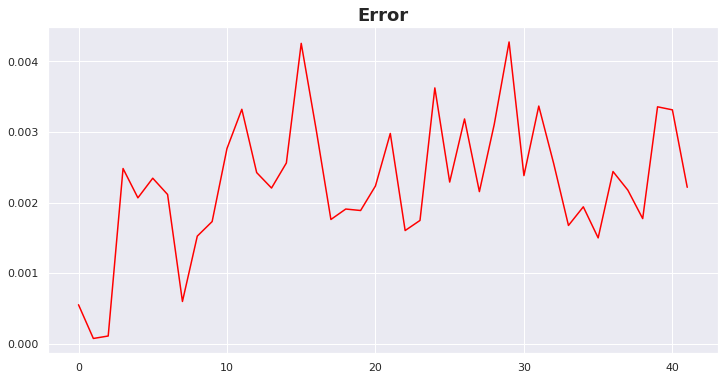

In [24]:
modelAccuracy(model, data=(transformed_test_data,test_targets), visualize=True)

## Bigger test set of original data

In [25]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_targets,test_targets = train_test_split(df_features.drop(["dryShrinkage","dryWidth"],axis=1)
                                                                   ,df_features["dryShrinkage"],test_size=0.99,random_state=42)

In [30]:
test_data.head(2)

,m_uWidth,m_uLength,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,B1DecayCount,B1AllOtherDefectWidthSum,...,B9MoistureAvg,B9TemperatureAvg,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryMoisturePercentage
105,1750.23265,1602.08760,105.539248,35.988281,958.563657,193.3635,14,40.43055,2,142.9718,...,112.573504,35.593008,964.618131,3.51570,1,49.2198,5,0.0,0,5.505738
104,1750.23265,1599.76152,88.900494,36.483115,887.904271,55.0793,7,0.00000,0,0.0000,...,92.715647,36.072656,863.284365,34.57105,6,0.0000,0,0.0,0,1.099541


In [31]:
bigger_test_data = ss.transform(test_data)

In [33]:
bigger_test_data.shape

(136, 84)

### Predict again with bigger set

In [34]:
pred = model.predict(bigger_test_data)


		Predicitons and targets
--------------------------------------------------------
 Average difference:	0.0024363239902638538
 Max difference:	0.004824741556599066
 Min difference:	-0.00015493996407045518
--------------------------------------------------------


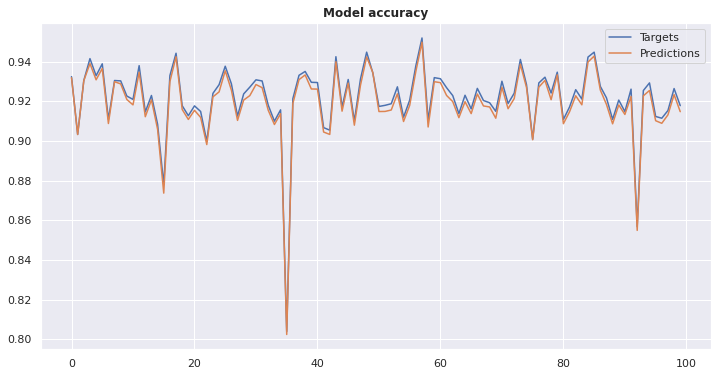

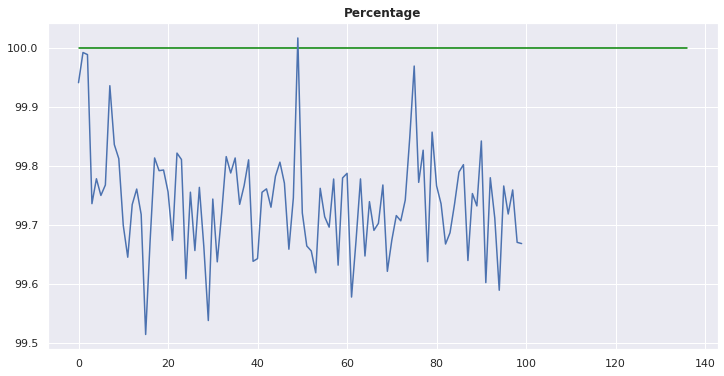

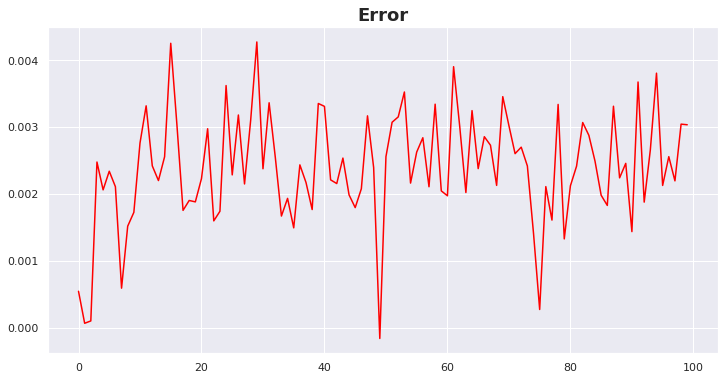

In [36]:
modelAccuracy(model, data=(bigger_test_data,test_targets), visualize=True)

In [31]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_targets,test_targets = train_test_split(df_features.drop(["dryShrinkage","dryWidth"],axis=1)
                                                                   ,df_features["dryShrinkage"],test_size=0.99,random_state=42)

In [32]:
bigger_test_data = ss.transform(test_data)

In [38]:
# Newest and the best model atm
# The original data wasn't included to this model's training
model= 'RegModel' 
path = '/home/jovyan/work/team-network-training/Sprint 6/models/'

# model= 'Adam4_model.h5' 
# path = '/home/jovyan/work/team-network-training/Sprint 5/HDF5Models/'

# loaded_model = tf.keras.models.load_model(path+model, custom_objects={"distance_from_true": distance_from_true,
#                                                                       "precentage_from_true": precentage_from_true})  


loaded_model = tf.keras.models.load_model(path+model)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               21760     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 65,537
Trainable params: 65,537
Non-trainable params: 0
____________________________________________________

### Define model

In [39]:
model = loaded_model

### Evaluate model

In [40]:
results = model.evaluate(bigger_test_data, test_targets)

5/5 [==============================] - 0s 4ms/step - loss: 2.9326e-06 - mae: 0.0015 - mse: 2.9326e-06 - mape: 0.1665


2/2 [==============================] - 0s 3ms/step - loss: 2.7311e-06 - mae: 0.0015 - mse: 2.7311e-06 - mape: 0.1595

### Make predictions

In [41]:
pred = model.predict(bigger_test_data)


		Predicitons and targets
--------------------------------------------------------
 Average difference:	0.0015118660299948234
 Max difference:	0.0056250674898477016
 Min difference:	-0.0009944575545680623
--------------------------------------------------------


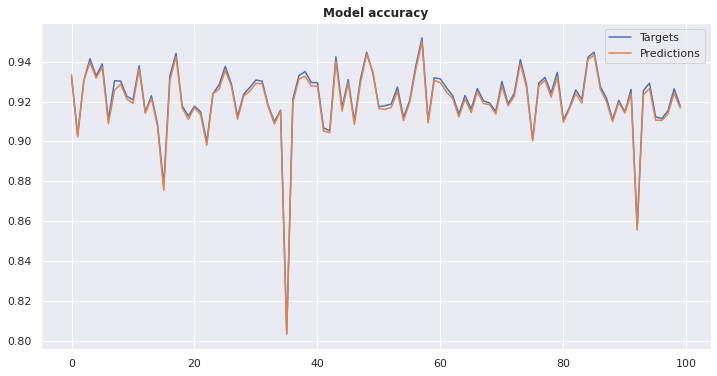

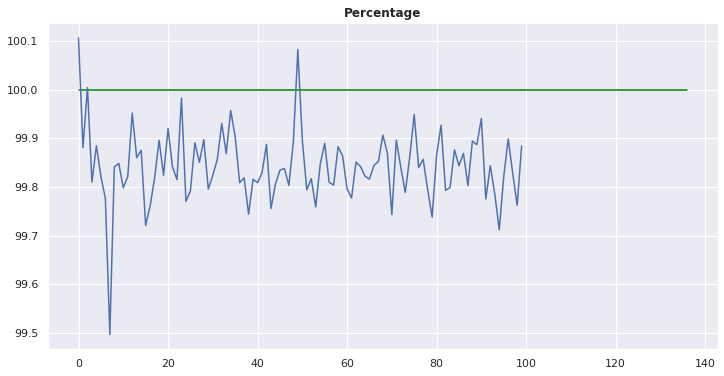

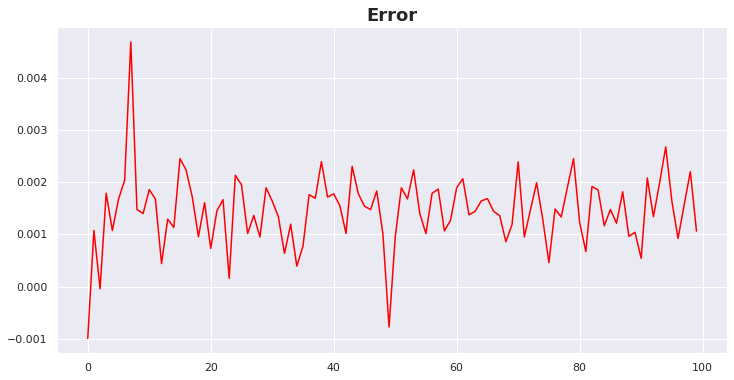

In [42]:
modelAccuracy(model, data=(bigger_test_data,test_targets), visualize=True)